# APPLE STOCK PRICE (time series)

IMPORTING REQUIRED PACKAGES

In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

## Reading the data

In [53]:
df=pd.read_csv("D:\\python\\AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100326,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095092,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088112,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090293,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092911,73449600


In [54]:
#viewing the shape of the data
shape=df.shape
print("The dataset contains",shape[0],"records and",shape[1],"features")

The dataset contains 10435 records and 7 features


In [55]:
#viewing the features
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [56]:
# Data Describtion :-
# Date : Date of trading
# Open : Price at which security first trades
# High : Highest Price of the trading day
# Low : Lowest Price of the trading day
# Close : Last Price the stock traded during the trading day
# Adj Close : Price that is adjusts Coroporate Actions on Closing Price
# Volume : Number of Shares that changed hands during the trading day

## Data cleaning and preprocessing

In [58]:
#setting date as index
df["Date"]=pd.to_datetime(df["Date"])
df.set_index(df["Date"],inplace=True)
df = df[df.index.year > 2011]

In [59]:
#droping the date column
df=df.drop(columns=["Date"])

In [60]:
#checking for data types
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [61]:
#checking for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [62]:
#checking for duplicate values
df.duplicated().sum()

0

In [63]:
#viewing the statistical information
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2.600000e+03
mean,52.807124,53.372416,52.251774,52.832776,51.069195,2.111905e+08
std,43.437424,43.973948,42.912437,43.464381,44.119808,1.743932e+08
min,13.856071,14.271429,13.753571,13.947500,12.119164,4.100000e+07
25%,23.817142,24.078393,23.589375,23.805000,21.550493,1.005045e+08
50%,34.703751,34.884998,34.648751,34.748750,32.808380,1.466400e+08
75%,56.983748,57.309998,56.469999,56.777499,55.202071,2.593355e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.506120e+09


## Resampling and imputing features

In [67]:
#resampling days wise stock price to monthwise
df_new=df.drop(columns=["Volume"]).resample("M").mean()
df_new["Volume"]=df["Volume"].resample("M").sum()
df_new.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-31,15.312857,15.393161,15.207518,15.306357,13.106439,6859854400
2012-02-29,17.671536,17.887464,17.551339,17.770393,15.216329,11368554400
2012-03-31,20.602078,20.788019,20.365925,20.625276,17.660891,15584338000
2012-04-30,21.771696,21.981697,21.380357,21.642964,18.532310,15598990400
2012-05-31,20.206607,20.433620,19.942760,20.166899,17.268394,11106345600


In [68]:
#imputing year,month,dayofweek,quarter from the date index
df_new['Year'] = df_new.index.year
df_new['Month'] = df_new.index.strftime('%B')
df_new['dayofweek'] = df_new.index.strftime('%A')
df_new['quarter'] = df_new.index.quarter
df_new.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,dayofweek,quarter
Date,,,,,,,,,,
2012-01-31,15.312857,15.393161,15.207518,15.306357,13.106439,6859854400,2012,January,Tuesday,1
2012-02-29,17.671536,17.887464,17.551339,17.770393,15.216329,11368554400,2012,February,Wednesday,1
2012-03-31,20.602078,20.788019,20.365925,20.625276,17.660891,15584338000,2012,March,Saturday,1
2012-04-30,21.771696,21.981697,21.380357,21.642964,18.532310,15598990400,2012,April,Monday,2
2012-05-31,20.206607,20.433620,19.942760,20.166899,17.268394,11106345600,2012,May,Thursday,2


In [69]:
#viewing the shape of the new imputed dataframe
print(df_new.shape)

(125, 10)


# Data visualisation 

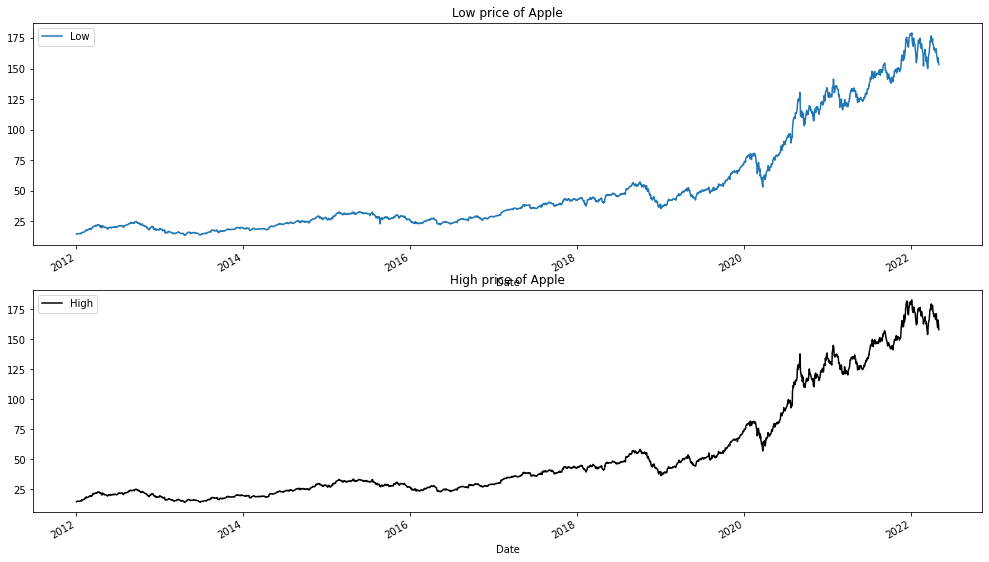

In [80]:
#high and low of stock
plt.figure(figsize =(17,10))
plt.subplot(2,1,1)
df["Low"].plot();
plt.legend(['Low'])
plt.title('Low price of Apple', fontsize = 12)
plt.subplot(2,1,2)
df["High"].plot(color='black');
plt.legend(['High']);
plt.title('High price of Apple', fontsize = 12);

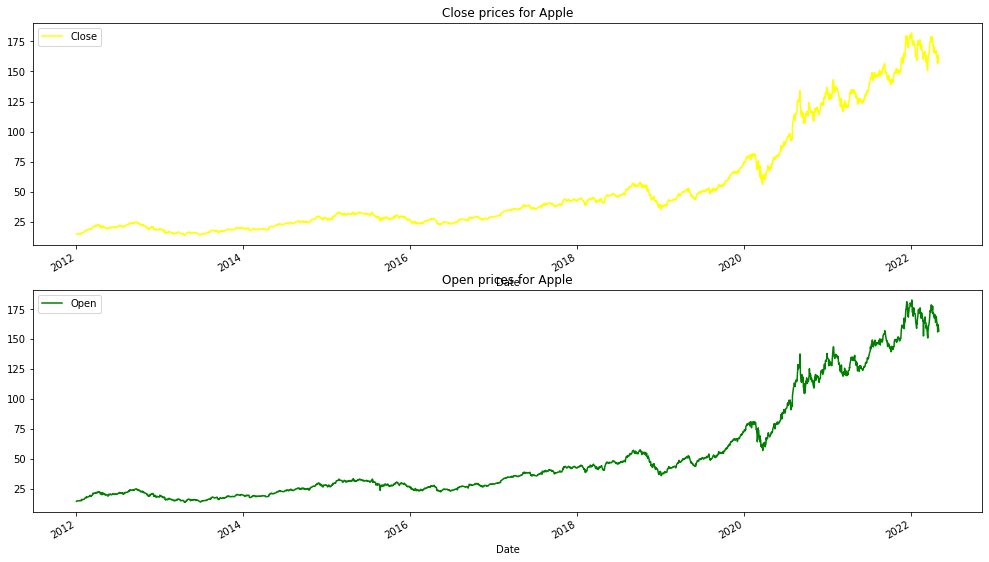

In [89]:
plt.figure(figsize =(17,10))
plt.subplot(2,1,1)
df["Close"].plot(color="yellow");
plt.legend(['Close'])
plt.title('Close prices for Apple', fontsize = 12)
plt.subplot(2,1,2)
df["Open"].plot(color='green');
plt.legend(['Open']);
plt.title('Open prices for Apple', fontsize = 12);

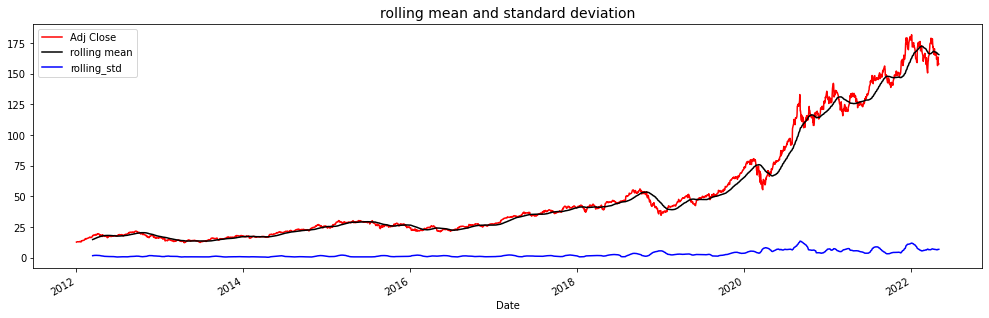

In [86]:
#closing price, mean average and standard deviation
plt.figure(figsize =(17,5))
df["Adj Close"].plot(color="red");
rolling_mean=pd.DataFrame.rolling(df["Adj Close"],window=50).mean()
rolling_std = pd.DataFrame.rolling(df["Adj Close"], window=50).std()
plt.plot(rolling_mean,color="black");
plt.plot(rolling_std,color="blue");
plt.legend(['Adj Close',"rolling mean","rolling_std"])
plt.title('rolling mean and standard deviation', fontsize = 14);

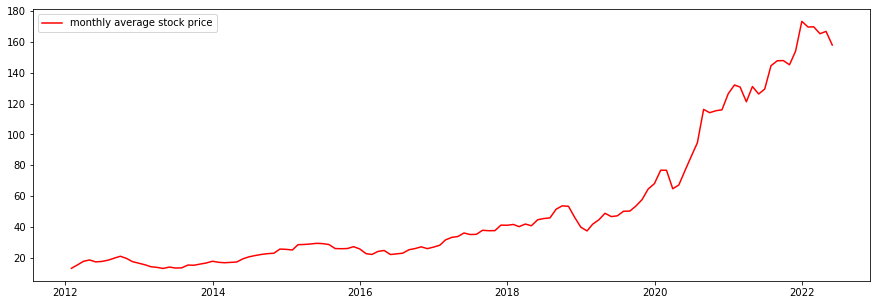

In [88]:
#viewing the stock price monthly
plt.figure(figsize =(15,5))
plt.plot(df_new["Adj Close"],color="red");
plt.legend(["monthly average stock price"]);

By seeing the graph we can infere that the closing price of the apple stock gradually increasing.

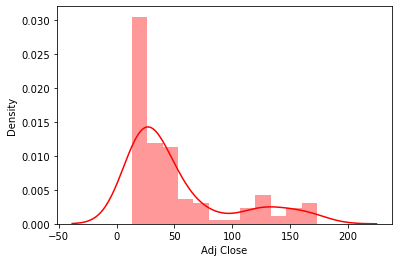

In [90]:
#viewing the distribution of "Adj Close"
sns.distplot(df_new["Adj Close"],color="red");

By seeing the graph we can say that our graph is sightlt right skewed.

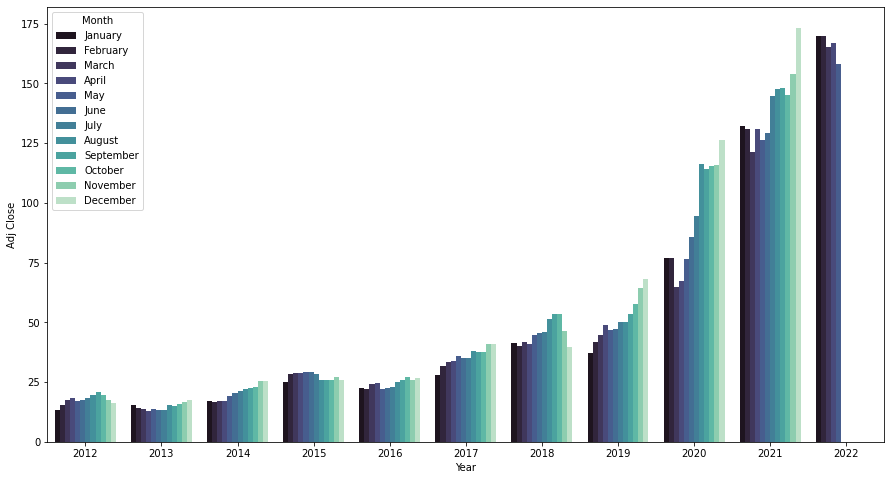

In [22]:
#viewing stock prices yesly and monthly
plt.figure(figsize =(15,8))
sns.barplot(x="Year", y="Adj Close",hue = 'Month',data=df_new,palette="mako");

## Checking if my data is stationary or not

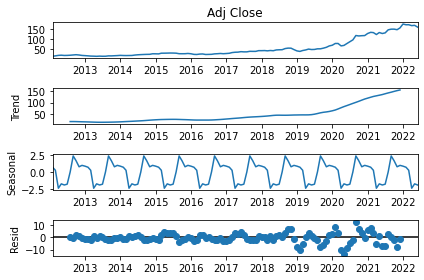

In [94]:
# plt.figure(figsize=(20,16))
sd=seasonal_decompose(df_new["Adj Close"],model="addictive",freq=12)
sd.plot();
plt.show()

By seeing the Trend graph we can say that there is an overall upward trend, and in seasonal graph we can see seasonality in the data.
As we can see there is upward trend and seasonality, THE DATA IS NOT STATIONARY

### Using dickey fuller test to confirm if my data is stationary or not

In [24]:
#null hypothesis--->data is not stationary
#alternate null hypothesis----->data is stationary
# accoring to dickey fuller test, if p value > 0.05, we fail to reject the null hypothesis, so data is non stationary.
# if p value <0.05, we reject null hypothesis, so data is stationary.
def dickey_fuller(data):
    adf=adfuller(data)
    print("p value: ",adf[1])
    if adf[1]>0.05:
        print("Fail to reject null hypothesis, so data is non stationary")
    else:
        print("rejecting the null hypothesis, so DATA IS STATIONARY")
    
dickey_fuller(df_new["Adj Close"])

p value:  0.9957107101604902
Fail to reject null hypothesis, so data is non stationary


## Making the data stationary

In [95]:
#performing LOG TRANSFORMATION to make the data stationary
df_new["one diff adj_close"]=np.log(df_new["Adj Close"])-np.log(df_new["Adj Close"].shift(1))
dickey_fuller(df_new["one diff adj_close"].dropna())

p value:  1.1822163993978453e-13
rejecting the null hypothesis, so DATA IS STATIONARY


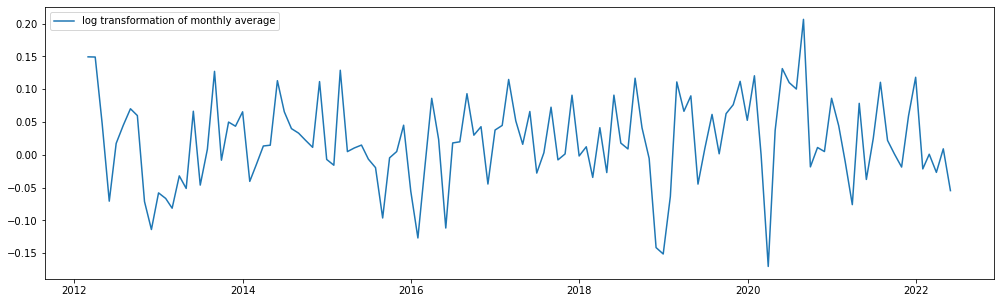

In [100]:
#plotting the stationary data
plt.figure(figsize =(17,5))
# rolling_mean_1diff=pd.DataFrame.rolling(df_new["one diff adj_close"],window=50).mean()
# rolling_std_1diff = pd.DataFrame.rolling(df_new["one diff adj_close"], window=50).std()
plt.plot(df_new["one diff adj_close"]);
plt.legend(["log transformation of monthly average"]);
# plt.plot(rolling_mean_1diff);
# plt.plot(rolling_std_1diff);

In the above graph we dont see any trend or seasonality so, data is stationary 

## Fitting arima model

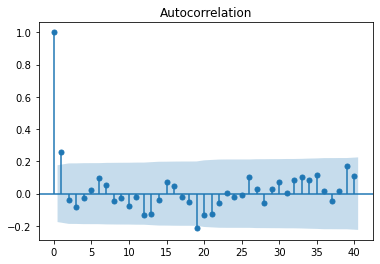

<Figure size 1080x576 with 0 Axes>

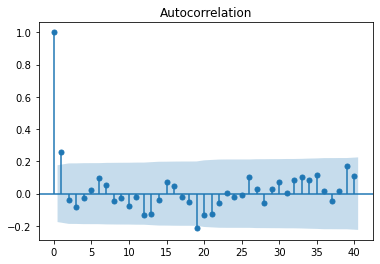

In [27]:
#getting the p,q,d fro arima model
fig = plt.figure(figsize=(15,8))
plot_acf(df_new['one diff adj_close'].dropna(),lags=40)

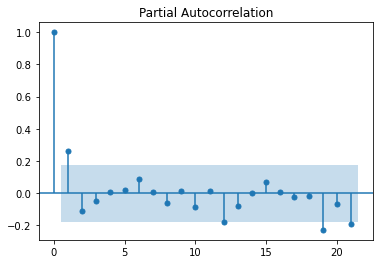

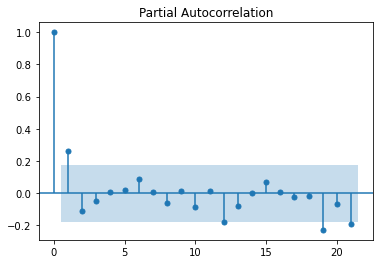

In [28]:
# ax2 = fig.add_subplot(212)
plot_pacf(df_new['one diff adj_close'].dropna())

by seeing the graph we can take p=1,q=1,d=1

In [29]:
model=ARIMA(df_new['one diff adj_close'].dropna(),order=(2,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARIMA Model Results                               
================================================================================
Dep. Variable:     D.one diff adj_close   No. Observations:                  123
Model:                   ARIMA(2, 1, 1)   Log Likelihood                 161.030
Method:                         css-mle   S.D. of innovations              0.064
Date:                  Wed, 13 Jul 2022   AIC                           -312.059
Time:                          13:10:28   BIC                           -297.998
Sample:                      03-31-2012   HQIC                          -306.348
                           - 05-31-2022                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0001      0.000      0.637      0.524      -0.000       0.001
ar.L1.D.one diff adj_close     0.2966      0.091      3.255      0.001       0.118       0.475
ar.L2.D.one diff adj_close    -0.1103      0.093     -1.191      0.234      -0.292       0.071
ma.L1.D.one diff adj_close    -1.0000      0.023    -44.061      0.000      -1.044      -0.956
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3449           -2.6946j            3.0116           -0.1763
AR.2            1.3449           +2.6946j            3.0116            0.1763
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

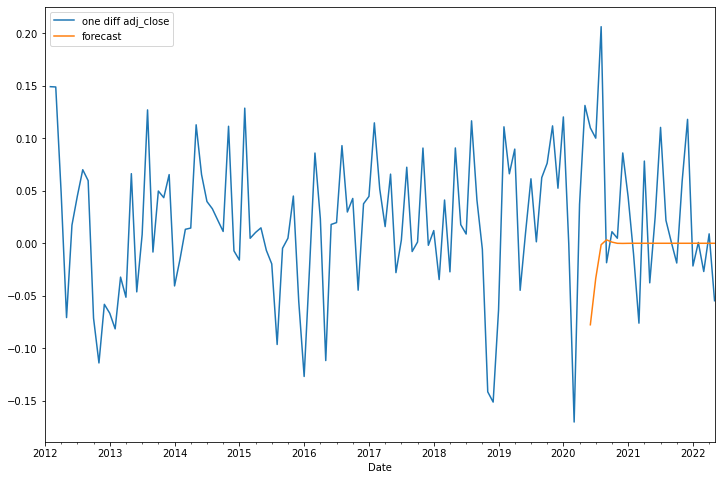

In [30]:
df_new['forecast']=model_fit.predict(start=100,end=3000,dynamic=True)
df_new[['one diff adj_close','forecast']].plot(figsize=(12,8))

by seeing the graph we can say that the predictioj is not done correct,coz this is a seasonal data so arima model will not work here, so we have to use sarimax.

## Fitting sarimax model

In [103]:
df_new["adj_close"]=df_new[["one diff adj_close"]].shift(-25)

<AxesSubplot:xlabel='Date'>

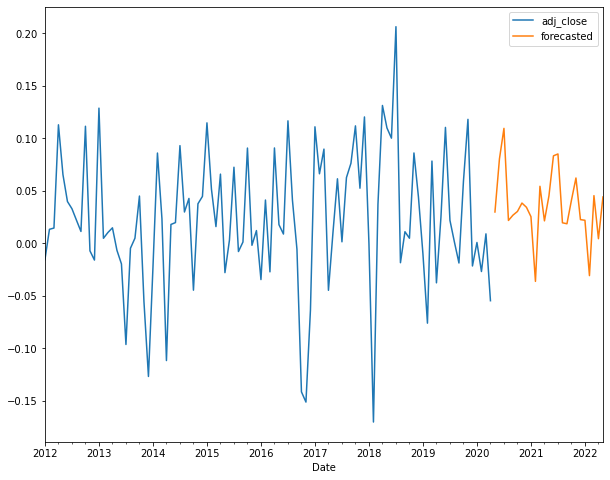

In [104]:
model=sm.tsa.statespace.SARIMAX(df_new['adj_close'].dropna(),order=(2, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_new['forecasted']=results.predict(start=100,end=3000,dynamic=True)
df_new[['adj_close','forecasted']].plot(figsize=(10,8))

in the graph we can that the orange lined graph is the next 25 predicted stock sales.